(ch:unsupervisedLearning)=
# 비지도 학습

**감사의 글**

자료를 공개한 저자 오렐리앙 제롱과 강의자료를 지원한 한빛아카데미에게 진심어린 감사를 전합니다.

**소스코드**

본문 내용의 일부를 파이썬으로 구현한 내용은 
[(구글코랩) 비지도 학습](https://colab.research.google.com/github/codingalzi/handson-ml3/blob/master/notebooks/code_unsupervised_learning.ipynb)에서 확인할 수 있다.

**슬라이드**

본문 내용을 요약한
[슬라이드 1부](https://github.com/codingalzi/handson-ml3/raw/master/slides/slides-unsupervised_learning-1.pdf)와
[슬라이드 2부](https://github.com/codingalzi/handson-ml3/raw/master/slides/slides-unsupervised_learning-2.pdf)를
다운로드할 수 있다.

**소개**

비지도 학습은 레이블이 없는 데이터를 학습하는 기법이다.
{numref}`%s장 <ch:dimensionalityReduction>`에서 다룬 차원 축소 기법도 비지도 학습의 전형적인 예제이다.
여기서는 다음 주제와 관련된 비지도 학습을 다룬다.

- 군집화: 비슷한 샘플끼리의 군집 형성
    * 고객 분류
    * 추천 시스템
    * 데이터 분석
    * 차원 축소
    * 특성 공학
    * 준지도 학습
    * 검색 엔진
    * 이미지 분할

- 이상치 탐지: 정상 테이터와 이상치 구분
    * 생산라인에서 결함 제품 탐지
    * 시계열데이터에서 새로운 트렌드 찾기

- 데이터 밀도 추정: 데이터셋의 확률 밀도를 추정
    * 이상치 분류: 밀도가 낮은 지역에 위치한 샘플
    * 데이터 시각화
    * 데이터 분석

## 분류 대 군집화

**군집**<font size='2'>cluster</font>은 유사한 대상들의 모음을 가리킨다.
예를 들어, 산이나 공원에서 볼 수 있는 이름 모르는 동일 품종의 꽃으로 이루어진 군집을 생각할 수 있다.
**군집화**<font size='2'>clustering</font>는 특정 기준으로 대상을 여러 개의 군집으로
나누는 과정을 가리킨다.

분류와 군집화는 각 샘플에 하나의 그룹을 할당한다는 점에서 유사하다.
하지만 분류는 미리 지정된 레이블(타깃)을 최대한 정확하게 예측하는 과정을 의미하는 반면에,
군집화는 미리 지정된 레이블(타깃)이 없음에도 불구하고 예측기 스스로 찾아낸 특정 기준을 이용해서
여러 개의 군집으로 나누는 과정을 가리킨다.

다음 세 종류의 군집화 알고리즘을 자세히 소개한다.
알고리즘에 따라 생성되는 군집의 특성과 모양이 다르다.

* k-평균: 센트로이드(중심)라는 특정 샘플을 중심으로 모인 샘플들의 집합
* DBSCAN: 밀집된 샘플들의 연속으로 이루어진 집합
* 가우스 혼합: 특정 가우스 분포를 따르는 샘플들의 집합

이외에 군집의 군집 등 다양한 군집의 모양과 특성이 존재한다.

**예제: 붓꽃 데이터셋 군집화**

아래 왼쪽 그림은 붓꽃의 꽃잎 길이와 너비를 특성으로 사용해서 품종을 분류한 결과를
보여주지만, 오른쪽 그림은 어떤 품종인지는 모르지만
노랑 동그라미아 검정 별표로 구분된 두 개의 군집을 보여준다. 
분류는 세 개의 품종을 매우 잘 분류하지만 군집은 세토사 군집과 나머지 군집으로 구분할 뿐이다.

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/handson-ml3/master/jupyter-book/imgs/ch09/homl09-01.png" width="80%"/></div>

반면에 **가우스 혼합 모델**<font size='2'>Gaussian Mixture Model</font>(GMM)을 
꽃잎의 길이와 너비 뿐만 아니라
꽃받침의 길이와 너비 특성까지 특성으로 사용하는 붓꽃 데이터셋에 대해 적용하면
세 개의 군집을 매우 정확하게 생성한다.

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/handson-ml3/master/jupyter-book/imgs/ch09/homl09-02.png" width="450"/></div>

## k-평균

군집의 중심인 센트로이드<font size='2'>centroid</font> 몇 개를 찾은 다음 
각 센트로이드에 가깝게 위치한 샘플들로 구성된 군집을 형성하는 기법이다.

**사이킷런의 `KMeans` 모델** 

아래 그림은 다섯 개의 샘플 덩어리로 이루어진 데이터셋을 보여준다.

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/handson-ml3/master/jupyter-book/imgs/ch09/homl09-03.png" width="450"/></div>

위 데이터셋에 대해 다섯 개의 군집을 형성하는 k-평균 알고리즘은 다음과 같이 적용한다.
군집 수를 몇 개로 지정하는 게 가장 좋은지는 미리 알 수 없다. 
나중에 몇 개의 군집이 적절한가를 판단하는 여러 방식을 살펴볼 것이다. 

아래 코드에서 `X`는 위 산점도에 포함된 데이터 샘플들로 구성된 훈련셋을 가리킨다.

```python
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)
```

**예측값**

`predict()` 함수의 반환값은 0, 1, 2, 3, 4 등 정수로 구성된다.
하지만 이는 임의로 지정된 군집의 인덱스를 가리킬 뿐이며 클래스 분류와는 아무 상관 없다.

```python
>>> y_pred
array([4, 0, 1, ..., 2, 1, 0])
```

**센트로이드 정보**

`KMeans` 모델이 찾아낸 센트로이드 정보는 `cluster_centers_` 속성에 저장된다.

```python
>>> kmeans.cluster_centers_
array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])
```

**보로노이 다이어그램**

**보로노이 다이어그램**<font size='2'>Voronoi diagram</font>은
평면을 특정 점(센트로이드)까지의 거리가 가장 가까운 점들의 집합으로 분할한 그림이다. 
점들이 군집을 잘 구성하는지 여부를 쉽게 확인할 수 있다.

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/handson-ml3/master/jupyter-book/imgs/ch09/homl09-04.png" width="450"/></div>

왼쪽 상단 군집에 포함된 샘플들 중에서  군집 경계 근처에 있는 샘플들의 군집이 잘못 지정됐다.
이유는 그 오른편에 위치한 군집의 직경이 보다 크기에 사실
그 군집에 속해야 하는 샘플이 왼쪽 센트로이드와의 거리가 단지 보다 가깝다는 이유로 왼쪽 군집으로 판정되었다.
이렇듯 군집의 직경이 서로 많이 다르면 군집화가 잘 작동하지 않을 수 있다.

**하드 군집화 대 소프트 군집화**

지금까지 살펴 보았듯이 k-평균 모델 객체의 labels_ 속성은 각 샘플에 대해 가장 가까운 센트로이드를 중심으로 하는 군집의 (작위적으로 지정된) 인덱스를 저장하며, 이를 이용하여 predict() 메서드는 샘플이 속하는 군집의 인덱스를 반환한다. 이런 방식의 군집화가 **하드 군집화**(hard clustering)이다.

반면에 **소프트 군집화**(soft clustering)는 샘플과 각 군집 사이의 관계를 점수로 부여한다. 점수는 예를 들어 각 군집과 샘플사이의 거리 또는 {numref}`%s장 <ch:end2end>`과 {numref}`%s장 <ch:svm>`에서 활용한 가우스 방사기저 함수를 이용한 유사도 점수 등이 사용될 수 있다. 

여기서 사용하는 사이킷런의 `KMeans` 모델의 `transform()` 메서드는 샘플과 각 센트로이드 사이의 (유클리드) 거리를 점수로 사용한다 (아래 코드 참고).

```python
>>> kmeans.transform(X_new).round(2)
array([[2.81, 0.33, 2.9 , 1.49, 2.89],
       [5.81, 2.8 , 5.85, 4.48, 5.84],
       [1.21, 3.29, 0.29, 1.69, 1.71],
       [0.73, 3.22, 0.36, 1.55, 1.22]])
```

반면에 `%s장 <ch:end2end>`에서 `Kmeans` 모델을 상속하는 형식으로 정의된 `ClusterSimilarity` 클래스의
`transform()` 메서드는 가우스 방사 기저 함수인 `rbf_kernel()` 함수를 이용하여 각 샘플에 대해 모든 센트로이드들과의 
유사도 점수를 계산한다.

```python
class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None): # sample_weight: 샘플별로 가중치 적용
        self.kmeans_ = KMeans(self.n_clusters, n_init=10, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # 항상 self 반환

    # 구역 데이터 샘플과 각 센트로이드 사이의 유사도 측정
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)

# 구역별 중앙 주택 가격을 샘플 가중치로 지정한 후에 군집화 실행. 
# 즉, 비싼 주택 가격을 갖는 구역을 중요시하며 따라서 센트로이드로 지정될 가능성을 높임.
# transform() 메서드는 각 샘플과 10개의 센트로이드 사이의 유사도 계산
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]], sample_weight=housing_labels)
```

처음 5 개 샘플과 각 센트로이드에 대한 유사도 점수는 다음과 같다.

```python
>>> similarities[:5].round(2)
array([[0.  , 0.14, 0.  , 0.  , 0.  , 0.08, 0.  , 0.99, 0.  , 0.6 ],
       [0.63, 0.  , 0.99, 0.  , 0.  , 0.  , 0.04, 0.  , 0.11, 0.  ],
       [0.  , 0.29, 0.  , 0.  , 0.01, 0.44, 0.  , 0.7 , 0.  , 0.3 ],
       [0.65, 0.  , 0.21, 0.  , 0.  , 0.  , 0.51, 0.  , 0.  , 0.  ],
       [0.86, 0.  , 0.89, 0.  , 0.  , 0.  , 0.14, 0.  , 0.03, 0.  ]])
```

:::{admonition} `rbf_kernel()` 함수
:class: info

다음 가우스 RBF 함수를 활용한다.
특정 지점을 가리키는 랜드마크<font size='2'>landmark</font> $\mathbf{p}$로부터 조금만 멀어져도 
함숫값이 급격히 작아진다. 

$$
\phi(\mathbf{x},\mathbf{p}) = \exp \left( -\gamma \|\mathbf{x} - \mathbf{p} \|^2 \right)
$$

예를 들어 아래 이미지는 중간 주택 년수가 35년에서 멀어질 수록 
함숫값이 급격히 0에 가까워지는 것을 보여준다.
하이퍼파라미터인 **감마**($\gamma$, gamma)는 데이터 샘플이 랜드마크로부터 멀어질 때
가우스 RBF 함수의 반환값이 얼마나 빠르게 0에 수렴하도록 하는가를 결정한다.
감마 값이 클 수록 랜드마크로부터 조금만 멀어져도 보다 빠르게 0에 수렴한다.
따라서 가우스 RBF 함수의 그래프가 보다 좁은 종 모양을 갖는다.

아래 그래프는

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/handson-ml3/master/jupyter-book/imgs/ch02/homl02-rbf_kernel.jpg" width="400"></div>
:::

In [1]:
import numpy as np

np.random.seed(42)

In [2]:
from sklearn.metrics.pairwise import rbf_kernel


In [4]:
import matplotlib.pyplot as plt

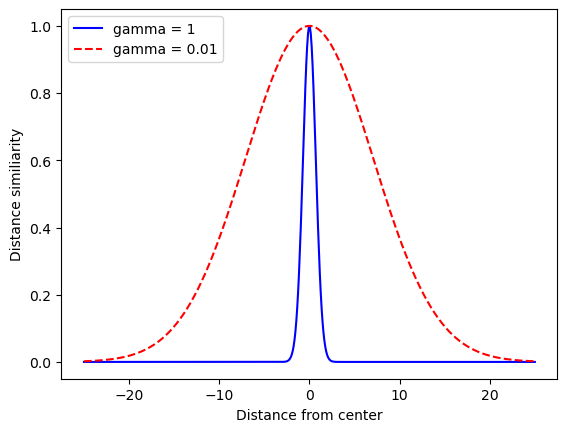

In [16]:
distances = np.linspace(-25, 25, 500).reshape(-1, 1)

gamma1 = 1
gamma2 = 0.01

rbf1 = rbf_kernel(distances, [[0]], gamma=gamma1)
rbf2 = rbf_kernel(distances, [[0]], gamma=gamma2)

fig, ax = plt.subplots()

ax.set_xlabel("Distance from center")
ax.set_ylabel("Distance similiarity")

ax.plot(distances, rbf1, color="blue", label="gamma = 1")
ax.plot(distances, rbf2, color="red", label="gamma = 0.01", linestyle="--")
# ax.tick_params(axis='y', labelcolor=color)

plt.legend(loc="upper left")
plt.show()

### k-평균 알고리즘

먼저 몇 개의 군집으로 분류할지를 정하기 위해 k 값을 지정한다.
그런 다음 k 개의 센트로이드를 무작위로 선택한 다음에 
센트로이드들의 위치가 수렴할 때까지 아래 과정을 반복한다.

* 각 샘플을 가장 가까운 센트로이드에 할당한다.
* 군집별로 샘플의 평균을 계산하여 새로운 해당 군집의 센트로이드로 지정한다.

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/handson-ml3/master/jupyter-book/imgs/ch09/homl09-05.png" width="700"/></div>

**무작위 초기화 문제**

임의로 선택된 초기 센트로이드에 따라 매우 다른 모양과 성질의 군집이 생성될 수 있다.
아래 오른쪽 그림은 센트로이드 초기화가 다를 경우 최종 결과도 많이 다를 수 있음을 잘 보여준다.

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/handson-ml3/master/jupyter-book/imgs/ch09/homl09-06.png" width="750"/></div>

### 센트로이드 초기화 문제 해결 방안

**관성**

**관성**<font size='2'>intertia</font>은 각 샘플과 가장 가까운 센트로이드와의 거리의 제곱의 합이며,
각 군집이 센트로이드에 얼마나 가까이 모여있는가를 측정한다.
따라서 관성이 작을 수록 군집이 잘 구성되었다고 평가한다.

훈련된 KMeans 모델의 경우 `inertia_` 속성에 관성 값이 저징되며,
`score()` 메서드가 관성의 음숫값을 반환한다. 
이유는 점수(score)는 높을 수록 좋은 모델을 나타내도록 해야 하기 때문이다. 
KMeans 모델은 훈련 과정 중에 다양한 초기화 과정을 실험하고 그 중에 
관성이 가장 작은 값이 되는 센트로이드를 선택한다.

**센트로이드 초기화 반복 횟수**

무작위 초기와 문제를 해결하기 위해 k-평균 알고리즘의 초기화를 여러 번 실행한 다음에 가장 낮은 
관성을 보이는 모델을 최종 모델로 선택한다.
이전 코드에서 `n_init=10`으로 지정되어 있어서 센트로이드 초기화를 10번 진행한다.

**k-평균++ 초기화 알고리즘**

센트로이드 무작위 초기화 문제의 보다 근본적인 해결책이 
아서(David Arthur)와 바실비츠키(Sergei Vassilvitskii)의 논문
[k-means++: the advantages of careful seeding](https://www.semanticscholar.org/paper/k-means%2B%2B%3A-the-advantages-of-careful-seeding-Arthur-Vassilvitskii/5e0c61b7ee4a2de183a197f32c5013ad109531fa)에서 제시되었다. 

k-평균++ 초기화 알고리즘은 기존에 선택된
센트로이드들과의 거리가 먼 샘플일 수록 다음 센트로이드로 선택될 확률이 높아지도록 한다.
보다 구체적으로 다음 과정을 따른다.

1. 임의로 하나의 센트로이드 $c_1$ 선택 후 $k$ 개의 센트로이드를 지정할 때까지 아래 과정을 반복한다.
1. $c_1, \dots, c_{i-1}$이 이미 선택되었가고 가정했을 대, 
    각 샘플  $\mathbf{x}_j$가 아래의 확률로 새로운 센트로이드 $c_i$로 선택되도록 한다.
    
    $$\frac{D(\mathbf{x}_j)^2}{\sum\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2}$$
    
    단, $m$은 훈련셋의 크기를, $D(\mathbf{x}_j)$는 $\mathbf{x}_j$와 이미 선택된 $c_1, \dots, c_{i-1}$ 중에서 
    가장 가까운 센트로이드 사이의 거리를 가리킨다.
        
    $$D(\mathbf{x}_j) = \min_{p<i} \| x_j - c_p \|$$

확률 계산으로 인해 초기화 비용이 좀 더 많이 들어가긴 하지만 결과적으로 초기화 횟수(`n_init`)를
획기적으로 줄일 수 있는 장점이 보다 크다.
따라서 사이킷런의 `KMeans` 모델의 기본 초기화 알고리즘으로 사용된다.

**미니배치 k-평균**

미니배치를 사용해서 센트로이드를 조금씩 이동하는 k-평균 알고리즘이다. 
사이킷런의 `MiniBatchMeans` 모델이 지원한다. 

```python
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10,
                                   random_state=42)
minibatch_kmeans.fit(X_memmap)
```

군집수가 많아질 수록 k-평균보다 서너 배 정도 빠르게 훈련되지만, 성능은 조금 낮다.

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/handson-ml3/master/jupyter-book/imgs/ch09/homl09-07.png" width="700"/></div>

:::{admonition} `MiniBatchKMeans`와 `memmap` 클래스
:class: info

{numref}`%s장 <ch:dimensionalityReduction>`에서 점진적 PCA를 소개하면서 언급한
넘파이 `memmap` 클래스를 이용하여 매우 큰 데이터셋을 조금씩 모델에 제공할 수 있다.
:::

### 최적의 군집수

군집수가 적절하지 않으면 좋지 않은 모델로 수렴할 수 있다.

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/handson-ml3/master/jupyter-book/imgs/ch09/homl09-08.png" width="700"/></div>

**방법 1: 관성과 군집수**

군집수 k가 증가할 수록 관성은 기본적으로 줄어들기에 관성만으로 모델을 평가할 수는 없다.
하지만 관성이 더 이상 획기적으로 줄어들지 않는 지점을 군집수 후보로 선정할 수 있다.
예를 들어 아래 그래프는 k가 1부터 9까지 변하는 동안 훈련된 모델의 관성을 측정하며,
관성이 줄어드는 현상이 약화되는 k=4를 후보로 추천한다.

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/handson-ml3/master/jupyter-book/imgs/ch09/homl09-09.png" width="600"/></div>

이유는 군집이 네 개보다 작으면 별로이고, 4개보다 많아도 훨씬 좋아진다고 보기 어렵기 때문이다.
하지만 4개의 군집으로 구성하려 하면 아래 그림과 같이 왼쪽 하단 두 개의 군집이 하나의 군집으로 처리될 수 있기에
가장 좋은 군집화라고 말하기 어렵다.

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/handson-ml3/master/jupyter-book/imgs/ch09/homl09-10.png" width="400"/></div>

**방법 2: 실루엣 점수와 군집수**

**실루엣 점수**<font size='2'>silhouette score</font> 샘플별 실루엣 계수의 평균값이다. 
샘플의 **실루엣 계수**<font size='2'>silhouette coefficient</font>는 
다음 식으로 계산된다.

$$\frac{b - a}{\max(a, b)}$$

- $a$: 동일 군집 내의 다른 샘플들과의 거리의 평균값
- $b$: 가장 가까운 타 군집에 속하는 샘플들과의 거리의 평균값

실루엣 계수는 -1과 1사이의 값이며, 다음 특성을 보여준다.

* 1에 가까운 값: 적절한 군집에 포함됨.
* 0에 가까운 값: 군집 경계에 위치
* -1에 가까운 값: 잘못된 군집에 포함됨

k=4가 여전히 매우 좋아 보인다. 
하지만 관성의 경우와는 달리 k=5도 역시 꽤 좋다는 것을 알 수 있다. 

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/handson-ml3/master/jupyter-book/imgs/ch09/homl09-11.png" width="600"/></div>

**방법 3: 실루엣 다이어그램과 군집수**

**실루엣 다이어그램**은 군집별로 실루엣 계수들의 모아 놓은 그래프다.
군집별로 실루엣 계수를 내림차순으로 정렬하면 칼날 모양이 형성된다.

- 칼날 두께: 군집에 포함된 샘플 수
- 칼날 길이: 군집에 포함된 각 샘플의 실루엣 계수
- 빨강 파선: 실루엣 점수, 즉 실루엣 계수의 평균값이다. 

좋은 군집 모델은 대부분의 칼날이 빨간 파선보다 길어야 하며,
칼날의 두께가 서로 비슷해야 한다. 
즉, 군집별 크기가 비슷해야 좋은 모델이다.
이런 기준으로 볼 때 `k=5` 가 가장 좋은 모델이다.

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/handson-ml3/master/jupyter-book/imgs/ch09/homl09-12.png" width="700"/></div>

### k-평균의 한계

첫째, 최적의 모델을 구하기 위해 여러 번 학습해야 한다.

둘째, 군집수를 미리 지정해야 한다.

셋째, 군집의 크기나, 샘플의 밀도가 다르거나, 원형이 아닐 경우 잘 작동하지 않는다.
예를 들어, 아래 그림에서 사용된 데이터 샘플들의 분포가 원형이 아니다.
오른쪽의 관성이 보다 작지만 훨씬 나뿐 군집이 생성되었다.
데이터 분포가 타원형인 경우 이어서 소개하는 가우스 혼합 모델(GMM)이 매우 잘 작동한다.

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/handson-ml3/master/jupyter-book/imgs/ch09/homl09-13.png" width="600"/></div>

## 군집화 활용

### 이미지 분할

이미지 분할은 보통 다음 세 가지 중에 하나를 가리킨다.

- 시맨틱 분할
- 인스턴스 분할
- 색상 분할

**시맨틱 분할**<font size='2'>semantic segmentation</font>은
사진에 들어 있는 사물들을 클래스별로 분할한다.
예를 들어 아래 왼쪽 사진에서 배경과 구분된 고양이들을 묶어서 cat 클래스로 분류한다.
다만 고양의 종류와 개수는 따지지 않는다.

**인스턴스 분할**<font size='2'>instance segmentation</font>은 클래스 뿐만 아니라 객체도 분할한다.
예를 들어 아래 오른쪽 사진에서 배경과 구분된 각각의 고양이를 cat1, cat2 등으로 구별한다.

<div align="center"><img src="https://drek4537l1klr.cloudfront.net/chollet2/v-7/Figures/instance_segmentation.png" style="width:80%;"></div>

<p><div style="text-align: center">&lt;그림 출처: <a href="https://www.manning.com/books/deep-learning-with-python-second-edition">Deep Learning with Python(2판)</a>&gt;</div></p>

**색상 분할**<font size='2'>color segmentation</font>은 유사 색상으로 이루어진 군집으로 분할하는 것을 의미한다.
아래 그림은 무당벌레가 포함된 이미지를 대상으로 색상 수를 다르게 하면서
색상 분할을 시도한 결과를 보여준다.

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/handson-ml3/master/jupyter-book/imgs/ch09/homl09-14.png" width="80%"/></div>

### 준지도 학습

**준지도 학습**<font size='2'>semi-supervised learning</font>은 
레이블이 있는 데이터가 적고, 레이블이 없는 데이터가 많을 때 활용한다.

:::{prf:example} 미니 MNIST 데이터셋

미니 MNist 데이터셋은 1,797 개의 8x8 크기의 손글씨 이미지로 구성된다.
:::

예를 들어, 미니 MNIST 데이터셋을 50개의 군집으로 나눈 후 각 군집에서 
센트로이드에 가장 가까운 샘플 50개를 대표 이미지로 선정한다.
선정된 50개 샘플만을 이용하여 분류 모델을 훈련해도 84.9%의 정확도가 달성된다.

**레이블 전파**

대표 이미지의 레이블을 해당 군집의 모든 샘플로 전파하는
기법을 **레이블 전파**<font size='2'>label propagation</font>라 한다.
레이블 전파를 이용하여 예를 들어 미니 MNIST 데이터셋의 50개 군집의 대표 이미지의 레이블을 각 군집의 전체 샘플에 전파한 다음에
전체 훈련셋을 대상으로 분류 모델을 훈련하면 89% 이상으로 정확도가 올라간다.

또한 센트로이드에 가장 멀리 떨어진 1%의 데이터를 이상치로 취급하여 각 군집에서 제외시킨 
다음에 레이블 전파된 훈련셋을 이용하면 분류 모델의 성능이 조금이나마 향상된다.

`sklearn.semi_supervised` 패키지는 다양한 레이블 전파 클래스를 제공한다. 

- `LabelSpreading`
- `LabelPropagation`
- `SelfTrainingClassifier`

**준지도 학습과 능동 학습**

모델의 성능을 보다 높이기 위한 다음 단계로 
**능동 학습**<font size='2'>Active Learning</font> 기법을 적용할 수 있다.
능동 학습은 기존에 훈련된 모델의 약점을 보완하려는 목적으로
일부 샘플을 사람이 직접 확인해서 라벨을 지정하는 과정을 모델의 성능이 더 이상 
개선되지 않을 때까지 반복한다.

다양한 샘플 선택 전략이 알려져 있지만 **불확실성 샘플링**<font size='2'>uncertainty sammpling</font> 전략이
가장 많이 사용되며, 아래 과정을 훈련 성능이 더 이상 개선되지 않을 때까지 반복한다.

1. 기존에 정리된 훈련셋을 이용하여 모델을 학습시킨다.
1. 훈련된 모델이 예측에 대해 가장 불확실해 하는 샘플들을 대상으로 사람이 직접 라벨을 확인한다.

## DBSCAN

* 연속적인 밀집 지역을 하나의 군집으로 설정.

**사이킷런의 DBSCAN 모델**

* 두 개의 하이퍼파라미터 사용
    * `eps`: $\varepsilon$-이웃 범위
        * 주어진 기준값 $\varepsilon$ 반경 내에 위치한 샘플
    * `min_samples`: $\varepsilon$ 반경 내에 위치하는 이웃의 수

**핵심샘플과 군집**

* 핵심샘플: $\varepsilon$ 반경 내에 자신을 포함해서 `min-samples`개의 이웃을 갖는 샘플

* 군집: 핵심샘플로 이루어진 이웃들로 구성된 그룹

**이상치**

* 핵심샘플이 아니면서 동시에 핵심샘플의 이웃도 아닌 샘플.

**예제:** 반달모양 데이터 활용

---
```python
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)
```
---

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/handson-ml3/master/jupyter-book/imgs/ch09/homl09-16.png" width="600"/></div>

**DBSCAN과 예측**

* `predict()` 메서드 지원하지 않음.

* 이유: `KNeighborsClassifier` 등 보다 좋은 성능의 분류 알고리즘 활용 가능.

* 아래 코드: 핵심샘플 대상 훈련.

---
```python
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])
```
---

* 이후 새로운 샘플에 대한 예측 가능
* 아래 그림은 새로운 4개의 샘플에 대한 예측을 보여줌.

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/handson-ml3/master/jupyter-book/imgs/ch09/homl09-17.png" width="450"/></div>

**이상치 판단**

* 위 예제에서, 두 군집으로부터 일정거리 이상 떨어진 샘플을 이상치로 간주 가능.

* 예를 들어, 양편 끝쪽에 위치한 두 개의 샘플이 이상치로 간주될 수 있음.

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/handson-ml3/master/jupyter-book/imgs/ch09/homl09-17a.png" width="450"/></div>

**DBSCAN의 장단점**

* 매우 간단하면서 매우 강력한 알고리즘.
    * 하이퍼파라미터: 단 2개

* 군집의 모양과 개수에 상관없음.

* 이상치에 안정적임.

* 군깁 간의 밀집도가 크게 다르면 모든 군집 파악 불가능.

**계산복잡도**

* 시간복잡도: 약 $O(m\, \log m)$. 단, $m$은 샘플 수

* 공간복잡도: 사이킷런의 DBSCAN 모델은 $O(m^2)$의 메모리 요구.
    * `eps`가 커질 경우.

**기타 군집 알고리즘**

* 응집 군집(병합 군집, agglomerative clustering)
* BIRCH
* 평균-이동
* 유사도 전파
* 스펙트럼 군집

## 가우스 혼합 모델

* 데이터셋이 여러 개의 혼합된 가우스 분포를 따르는 샘플들로 구성되었다고 가정.

* 가우스 분포 = 정규분포

**정규분포 소개**

* 종 모양의 확률밀도함수를 갖는 확률분포

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/handson-ml3/master/jupyter-book/imgs/ch09/homl09-18.png" width="400"/></div>

**군집**

* 하나의 가우스 분포에서 생생된 모든 샘플들의 그룹
* 일반적으로 타원형 모양.

**예제**

* 아래 그림에서처럼 일반적으로 모양, 크기, 밀집도, 방향이 다름.
* 따라서 각 샘플이 어떤 정규분포를 따르는지를 파악하는 게 핵심.

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/handson-ml3/master/jupyter-book/imgs/ch09/homl09-13.png" width="600"/></div>

**GMM 활용**

* 위 데이터셋에 `GaussianMixture` 모델 적용

* `n_components`: 군집수 지정

* `n_init`: 모델 학습 반복 횟수. 
    * 파라미터(평균값, 공분산 등)를 무작위로 추정한 후 수렴할 때까지 학습시킴.

---
```python
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)
```
---

* 아래 그림은 학습된 모델을 보여줌.
    * 군집 평균, 결정 경계, 밀도 등고선

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/handson-ml3/master/jupyter-book/imgs/ch09/homl09-19.png" width="500"/></div>

**GMM 모델 규제**

* 특성수가 크거나, 군집수가 많거나, 샘플이 적은 경우 최적 모델 학습 어려움.
* 공분산(covariance)에 규제를 가해서 학습을 도와줄 수 있음.
    * `covariance_type` 설정.

**covariance_type 옵션값**

* full
    * 아무런 제한 없음.
    * 기본값임.

* spherical
    * 군집이 원형이라 가정. 
    * 지름(분산)은 다를 수 있음.

* diag
    * 어떤 타원형도 가능.
    * 단. 타원의 축이 좌표축과 평행하다고 가정.

* tied
    * 모든 군집의 동일 모양, 동일 크기, 동일 방향을 갖는다고 가정.

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/handson-ml3/master/jupyter-book/imgs/ch09/homl09-20.png" width="600"/></div>

### 가우스 혼합 모델 활용: 이상치 탐지

* 밀도가 임곗값보다 낮은 지역에 있는 샘플을 이상치로 간주 가능.

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/handson-ml3/master/jupyter-book/imgs/ch09/homl09-21.png" width="500"/></div>

### 가우션 혼합모델 군집수 지정

* k-평균에서 사용했던 관성 또는 실루엣 점수 사용 불가.
    * 군집이 타원형일 때 값이 일정하지 않기 때문.

* 대신에 __이론적 정보 기준__ 을 최소화 하는 모델 선택 가능.

**이론적 정보 기준**

* BIC: Bayesian information criterion

    $$ \log(m)\, p - 2 \log (\hat L)$$

* AIC: Akaike information criterion

    $$ 2\, p - 2 \log (\hat L)$$

* $m$: 샘플 수
* $p$: 모델이 학습해야 할 파라미터 수
* $\hat L$: 모델의 가능도 함수의 최댓값

* 학습해야 할 파라미터가 많을 수록 벌칙이 가해짐.
* 데이터에 잘 학습하는 모델일 수록 보상을 더해줌.

**군집수와 정보조건**

* 아래 그림은 군집수 $k$와 AIC, BIC의 관계를 보여줌.
* $k=3$이 최적으로 보임.

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/handson-ml3/master/jupyter-book/imgs/ch09/homl09-22.png" width="600"/></div>

### 베이즈 가우스 혼합 모델

* 베이즈 확률통계론 활용

**BayesianGaussianMixture 모델**

* 최적의 군집수를 자동으로 찾아줌.
* 단, 최적의 군집수보다 큰 수를 `n_components`에 전달해야 함.
    * 즉, 군집에 대한 최소한의 정보를 알고 있다고 가정.
* 자동으로 불필요한 군집 제거

---
```python
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
```
---

* 결과는 군집수 3개를 사용한 이전 결과와 거의 동일.
* 군집수 확인 가능

```python
>>> np.round(bgm.weights_, 2)
array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])
```

**사전 믿음**

* 군집수가 어느 정도일까를 나타내는 지수
* `weight_concentration_prior` 하이퍼파라미터
    * `n_components`에 설정된 군집수에 대한 규제로 사용됨.
    * 작은 값이면 특정 군집의 가중치를 0에 가깝게 만들어 군집수를 줄이도록 함.
    * 즉, 큰 값일 수록 `n_components`에 설정된 군집수가 유지되도록 함.

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/handson-ml3/master/jupyter-book/imgs/ch09/homl09-24.png" width="600"/></div>

**가우스 혼합 모델의 장단점**

* 타원형 군집에 잘 작동.

* 하지만 다른 모양을 가진 데이터셋에서는 성능 좋지 않음.

* 예제: 달모양 데이터에 적용하는 경우
    * 억지로 타원을 찾으려 시도함.

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/handson-ml3/master/jupyter-book/imgs/ch09/homl09-23.png" width="700"/></div>

### 이상치 탐지와 특이치 탐지를 위한 다른 알고리즘

* PCA
* Fast-MCD
* 아이솔레이션 포레스트
* LOF
* one-class SVM

## 연습문제

1. [2장](https://codingalzi.github.io/handson-ml3/end2end_ml_project.html#id18)에서 정의한 
    `ClusterSimilarity`에 사용된 `KMeans` 모델의 `n_cluster` 인자의 최적값을 확인하라.